In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [9]:
df = pd.read_csv("../dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In this columns "Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin" we have minimum value as 0. This can not happen in real senario there must be some value more than 0 it can not be only 0. So we can replace this minimum value 0 to mean of there respective columns.

In [13]:
df["Pregnancies"] = df["Pregnancies"].replace(0,df["Pregnancies"].mean())
df["Glucose"] = df["Glucose"].replace(0,df["Glucose"].mean())
df["BloodPressure"] = df["BloodPressure"].replace(0,df["BloodPressure"].mean())
df["SkinThickness"] = df["SkinThickness"].replace(0,df["SkinThickness"].mean())
df["Insulin"] = df["Insulin"].replace(0,df["Insulin"].mean())

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: >

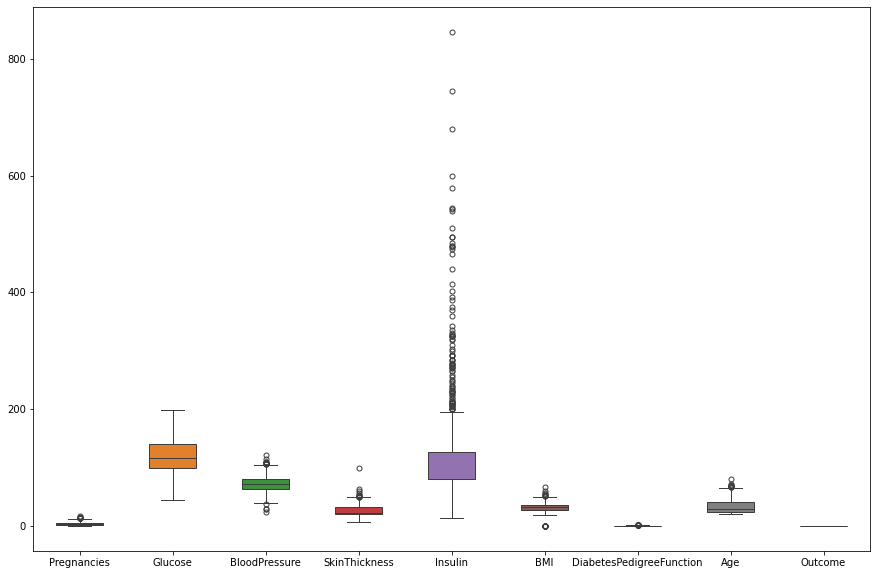

In [22]:
fig,ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df,ax=ax,fliersize=5,width=0.5)

In [25]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [27]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [38]:
import pickle

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

file = open("../models/StandardScaler.pkl","wb")
pickle.dump(scaler,file)
file.close()

In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [41]:
## Hyperparameter Tuning
## GridSearch CV

In [53]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings(action="ignore")

parameters = {
    "penalty":["l1","l2"],
    "C":np.logspace(-3,3,7),
    "solver":["newton-cg","lbfgs","liblinear"]
}

In [79]:
clf = GridSearchCV(log_reg,param_grid=parameters,scoring="accuracy",cv=10)
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [80]:
clf.best_params_

{'C': 1.0, 'penalty': 'l1', 'solver': 'liblinear'}

In [81]:
clf.best_score_

0.7707803992740472

In [82]:
clf.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [83]:
y_pred = clf.predict(X_test_scaled)

In [84]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [85]:
true_positive = conf_matrix[0][0]
true_negative = conf_matrix[1][1]
false_positive = conf_matrix[0][1]
false_negative = conf_matrix[1][0]

In [86]:
Accuracy = (true_positive + true_negative) / (true_positive + false_positive + true_negative + false_negative)
Accuracy

0.8020833333333334

In [91]:
Precision = true_positive / (true_positive + false_positive)
Precision

0.9076923076923077

In [92]:
Recall = true_positive / (true_positive + false_negative)
Recall

0.8194444444444444

In [93]:
F1_Score = (1 + 1**2 ) * (Precision * Recall) / (Precision + Recall)
F1_Score

0.8613138686131386

In [102]:
file = open("../models/Prediction_Model.pkl","wb")
pickle.dump(logreg,file)
file.close()